In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
!wget -O logo.png http://51.91.120.89/extras/python-logo.png

--2022-02-25 13:20:41--  http://51.91.120.89/extras/python-logo.png
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116883 (114K) [image/png]
Saving to: ‘logo.png’

logo.png            100%[===================>] 114.14K   142KB/s    in 0.8s    

2022-02-25 13:20:43 (142 KB/s) - ‘logo.png’ saved [116883/116883]



In [ ]:
# Pillow
im = Image.open("logo.png")
im.convert("L")

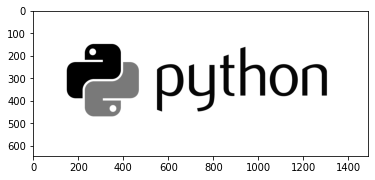

In [5]:
# Numpy
im = mpimg.imread("logo.png")
R, G , B = im[:, :, 0], im[:, :, 1], im[:, :, 2]
img_gray = R*0.2889 + G*0.587 + B*0.114
plt.imshow(img_gray, cmap='gray')

In [7]:
# !pip install opencv-python
import cv2

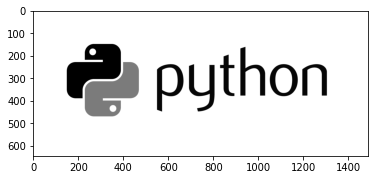

In [10]:
im = cv2.imread("logo.png")
img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

In [11]:
!wget -O anim.gif http://51.91.120.89/extras/cnn-anim.gif

--2022-02-25 13:48:12--  http://51.91.120.89/extras/cnn-anim.gif
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 257631 (252K) [image/gif]
Saving to: ‘anim.gif’

anim.gif            100%[===================>] 251.59K   232KB/s    in 1.1s    

2022-02-25 13:48:14 (232 KB/s) - ‘anim.gif’ saved [257631/257631]



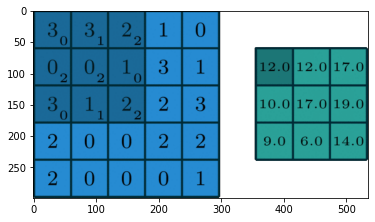

In [13]:
im = Image.open("anim.gif")
im.seek(0)
plt.imshow(im)

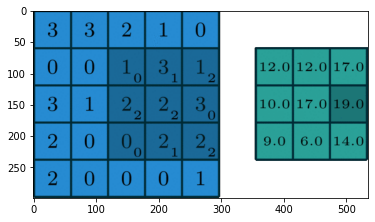

In [27]:
im = Image.open("anim.gif")
im.seek(5)
plt.imshow(im)

In [19]:
from scipy.signal import convolve2d

def convolve_image(img, kernel):
  img_conv = convolve2d(img, kernel)
  
  fig = plt.figure(figsize=(12,7))
  chart1 = fig.add_subplot(1, 2, 1)
  chart1.imshow(img, 'gray')

  chart2 = fig.add_subplot(1, 2, 2)
  chart2.imshow(img_conv, 'gray')


In [20]:
!wget -O cs.jpg http://51.91.120.89/extras/cs.jpg

--2022-02-25 14:01:38--  http://51.91.120.89/extras/cs.jpg
Connecting to 51.91.120.89:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64508 (63K) [image/jpeg]
Saving to: ‘cs.jpg’

cs.jpg              100%[===================>]  63.00K   118KB/s    in 0.5s    

2022-02-25 14:01:39 (118 KB/s) - ‘cs.jpg’ saved [64508/64508]



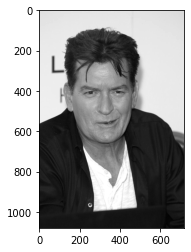

In [21]:
# Numpy
im = mpimg.imread("cs.jpg")
R, G , B = im[:, :, 0], im[:, :, 1], im[:, :, 2]
img_gray = R*0.2889 + G*0.587 + B*0.114
plt.imshow(img_gray, cmap='gray')

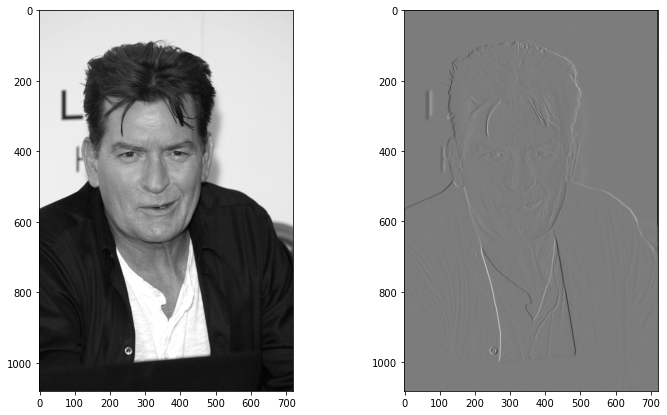

In [22]:
kernel = np.array([
     [1, 0, -1],                
     [2, 0, -2],
     [1, 0, -1],
])

convolve_image(img_gray, kernel)

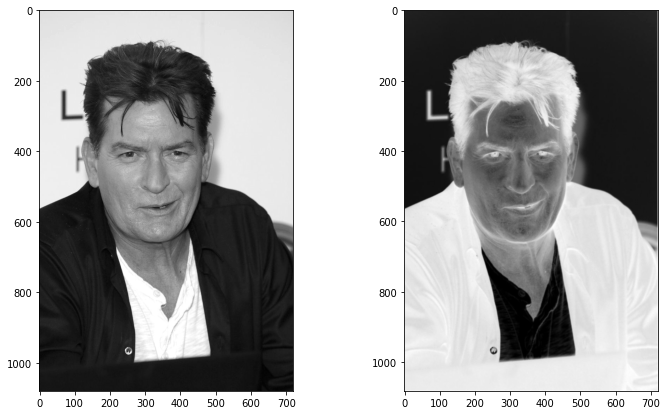

In [23]:
kernel = np.array([
     [-1, -1, -1],                
     [-1, -1, -1],
     [-1, -1, -1],
])

convolve_image(img_gray, kernel)

In [24]:
# konwolucja przy uzyciu klas bilioteki Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [26]:
img_gray.shape

(1080, 720)

In [44]:
model = Sequential()
model.add(
    Conv2D(filters=1, kernel_size=(3,3), input_shape=(1080, 720, 1) )
)
model.add(
    Conv2D(filters=1, kernel_size=(5,5))
)
model.add(
    Conv2D(filters=1, kernel_size=(10,10))
)

In [45]:
result = model.predict(img_gray.reshape(1, 1080, 720, 1) )
result.shape

(1, 1065, 705, 1)

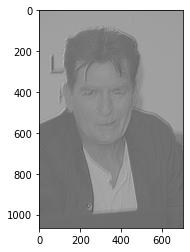

In [46]:
plt.imshow( result.squeeze() , 'gray')

In [48]:
from tensorflow.keras import backend

def custom_filter(shape, dtype=None):
  filter = np.array([
    [  [[-1]],[[-1]],[[-1]]    ],
    [  [[-1]],[[6]],[[-1]]    ],
    [  [[-1]],[[-1]],[[-1]]    ]                         
  ])
  return backend.variable(filter, "float32")

model = Sequential()
model.add(
    Conv2D(filters=1, kernel_size=(3,3), input_shape=(1080, 720, 1), kernel_initializer=custom_filter )
)


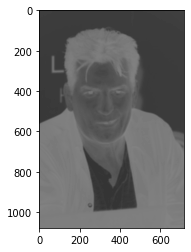

In [49]:
result = model.predict(img_gray.reshape(1, 1080, 720, 1) )
plt.imshow( result.squeeze() , 'gray')